In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load and Clean Data
data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values (you can choose an appropriate method)
data['LATEST_YEAR_ANNUAL_RETURN'].interpolate(method='linear', inplace=True)
data['LATEST_YEAR_FINANCIAL_STATEMENT'].interpolate(method='linear', inplace=True)

# Step 2: Convert Categorical Features to Numerical
label_encoder = LabelEncoder()
data['COMPANY_CLASS'] = label_encoder.fit_transform(data['COMPANY_CLASS'])
data['COMPANY_CATEGORY'] = label_encoder.fit_transform(data['COMPANY_CATEGORY'])
data['COMPANY_SUB_CATEGORY'] = label_encoder.fit_transform(data['COMPANY_SUB_CATEGORY'])



Missing Values:
 CORPORATE_IDENTIFICATION_NUMBER               0
COMPANY_NAME                                  0
COMPANY_STATUS                                0
COMPANY_CLASS                               334
COMPANY_CATEGORY                            334
COMPANY_SUB_CATEGORY                        334
DATE_OF_REGISTRATION                         39
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
INDUSTRIAL_CLASS                            310
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
REGISTERED_OFFICE_ADDRESS                    90
REGISTRAR_OF_COMPANIES                      174
EMAIL_ADDR                                38129
LATEST_YEAR_ANNUAL_RETURN                 75889
LATEST_YEAR_FINANCIAL_STATEMENT           75782
dtype: int64


C:\Users\Krishnan\AppData\Local\Temp\ipykernel_17324\2389522508.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')
C:\Users\Krishnan\AppData\Local\Temp\ipykernel_17324\2389522508.py:19: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data['LATEST_YEAR_ANNUAL_RETURN'].interpolate(method='linear', inplace=True)
C:\Users\Krishnan\AppData\Local\Temp\ipykernel_17324\2389522508.py:20: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data['LATEST_YEAR_FINANCIAL_STATEMENT'].interpolate(method='linear', inplace=True)


C:\Users\Krishnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,AUTHORIZED_CAP,PAIDUP_CAPITAL,Capital_Ratio,Capital_Difference
count,150871.000000,150871.000000,150871.000000,1.508710e+05,1.508710e+05,149995.00,1.508710e+05
mean,0.169701,1.000563,1.023484,3.522781e+07,2.328824e+07,inf,1.193957e+07
std,0.550590,0.113658,0.258196,1.408554e+09,1.072458e+09,NaN,4.469951e+08
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00,-3.651825e+09
25%,0.000000,1.000000,1.000000,1.000000e+05,1.000000e+05,0.10,0.000000e+00
50%,0.000000,1.000000,1.000000,8.000000e+05,1.000000e+05,0.55,2.750000e+05
75%,0.000000,1.000000,1.000000,2.000000e+06,6.857450e+05,1.00,9.000000e+05
max,3.000000,3.000000,5.000000,3.000000e+11,2.461235e+11,inf,5.752000e+10


C:\Users\Krishnan\AppData\Local\Temp\ipykernel_17324\3034168905.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='COMPANY_CLASS', palette=palette)
C:\Users\Krishnan\AppData\Local\Temp\ipykernel_17324\3034168905.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=data, x='COMPANY_CLASS', palette=palette)


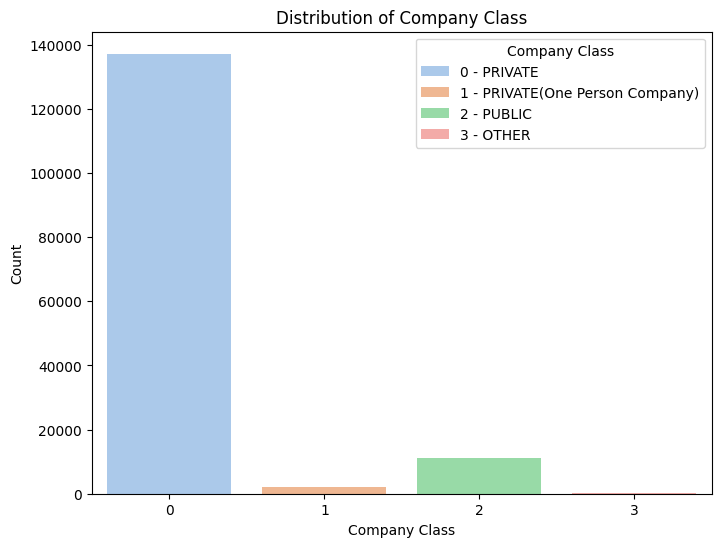

In [25]:
# Step 3: Exploratory Data Analysis (EDA)
# Basic statistics
summary_stats = data.describe()
display(summary_stats)
# Distribution of COMPANY_CLASS (public vs. private) with legend
plt.figure(figsize=(8, 6))

# Specify a color palette for each category
palette = sns.color_palette("pastel")  # You can change the palette as desired

sns.countplot(data=data, x='COMPANY_CLASS', palette=palette)

plt.title('Distribution of Company Class')
plt.xlabel('Company Class')
plt.ylabel('Count')

# Add legend with labels
plt.legend(title='Company Class', labels=['0 - PRIVATE',
    '1 - PRIVATE(One Person Company)',
    '2 - PUBLIC',
    '3 - OTHER'], loc='upper right')

plt.show()


In [23]:
# Step 4: Feature Engineering (you can create new features here)
# Example: Creating a feature that represents the ratio of two existing features
data['Capital_Ratio'] = data['PAIDUP_CAPITAL'].div(data['AUTHORIZED_CAP'])
data['Capital_Difference'] = data['AUTHORIZED_CAP'] - data['PAIDUP_CAPITAL']

data.describe()

C:\Users\Krishnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,AUTHORIZED_CAP,PAIDUP_CAPITAL,Capital_Ratio,Capital_Difference
count,150871.000000,150871.000000,150871.000000,1.508710e+05,1.508710e+05,149995.00,1.508710e+05
mean,0.169701,1.000563,1.023484,3.522781e+07,2.328824e+07,inf,1.193957e+07
std,0.550590,0.113658,0.258196,1.408554e+09,1.072458e+09,NaN,4.469951e+08
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00,-3.651825e+09
25%,0.000000,1.000000,1.000000,1.000000e+05,1.000000e+05,0.10,0.000000e+00
50%,0.000000,1.000000,1.000000,8.000000e+05,1.000000e+05,0.55,2.750000e+05
75%,0.000000,1.000000,1.000000,2.000000e+06,6.857450e+05,1.00,9.000000e+05
max,3.000000,3.000000,5.000000,3.000000e+11,2.461235e+11,inf,5.752000e+10


In [17]:
# Step 5: Predictive Modeling
# Split data into training and testing sets
X = data.drop(['registered'], axis=1)
y = data['registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier (you can choose another algorithm)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

COMPANY_CLASS for CIN F00643: 3


In [14]:
# Step 6: Model Evaluation
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

SyntaxError: invalid syntax (3208546701.py, line 1)